In [ ]:
api_token = {"username":"linknick","key":"a5f774c30aaf3355be9c3571abcbc9e3"}
import json
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np

In [ ]:

if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
!kaggle datasets download -d abhishekjaiswal4896/mental-wellness-tracker --force

!ls /kaggle

Dataset URL: https://www.kaggle.com/datasets/abhishekjaiswal4896/mental-wellness-tracker
License(s): apache-2.0
  0% 0.00/40.5k [00:00<?, ?B/s]
100% 40.5k/40.5k [00:00<00:00, 124MB/s]
input  mental-wellness-tracker.zip


In [ ]:
!A| unzip mental-wellness-tracker.zip -d dataset

/bin/bash: line 1: A: command not found
Archive:  mental-wellness-tracker.zip
  inflating: dataset/mental_wellness_test.csv  
  inflating: dataset/mental_wellness_tracker.csv  
  inflating: dataset/mental_wellness_train.csv  


In [ ]:
from sklearn.model_selection import train_test_split
DATA = pd.read_csv('/kaggle/dataset/mental_wellness_tracker.csv')

---

EDA

---



In [ ]:
print('Tracker shape:', DATA.shape)

Tracker shape: (1500, 12)


In [ ]:
DATA.head()

,User_ID,Date,Mood_Score,Sleep_Hours,Sleep_Quality,Screen_Time_Hours,Physical_Activity_Min,Social_Interaction_Hours,Work_Productivity_Score,Weather,Diet_Quality,Stress_Level
0,U001,2023-06-01,5,8.5,Fair,10.0,14,1.1,6,Rainy,Poor,5
1,U001,2023-06-02,6,8.0,Good,4.8,0,3.4,6,Cloudy,Average,4
2,U001,2023-06-03,7,7.4,Good,3.5,38,2.3,8,Cloudy,Good,6
3,U001,2023-06-04,3,7.9,Fair,4.5,46,0.9,5,Rainy,Average,7
4,U001,2023-06-05,4,6.9,Good,2.5,7,0.0,4,Cloudy,Good,7


In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   1500 non-null   object 
 1   Date                      1500 non-null   object 
 2   Mood_Score                1500 non-null   int64  
 3   Sleep_Hours               1500 non-null   float64
 4   Sleep_Quality             1500 non-null   object 
 5   Screen_Time_Hours         1500 non-null   float64
 6   Physical_Activity_Min     1500 non-null   int64  
 7   Social_Interaction_Hours  1500 non-null   float64
 8   Work_Productivity_Score   1500 non-null   int64  
 9   Weather                   1500 non-null   object 
 10  Diet_Quality              1500 non-null   object 
 11  Stress_Level              1500 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 140.8+ KB


In [ ]:
DATA.describe()

,Mood_Score,Sleep_Hours,Screen_Time_Hours,Physical_Activity_Min,Social_Interaction_Hours,Work_Productivity_Score,Stress_Level
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,6.018667,6.964467,5.001467,29.560000,2.108400,6.866000,4.072667
std,2.093141,1.427659,1.951120,14.699562,1.396544,2.264095,2.162985
min,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,6.000000,3.700000,20.000000,1.000000,5.000000,2.000000
50%,6.000000,7.000000,5.000000,29.000000,2.000000,7.000000,4.000000
75%,7.000000,7.900000,6.300000,39.000000,3.100000,9.000000,6.000000
max,10.000000,10.000000,12.000000,80.000000,7.000000,10.000000,10.000000


In [ ]:
DATA.describe(include='O')

,User_ID,Date,Sleep_Quality,Weather,Diet_Quality
count,1500,1500,1500,1500,1500
unique,50,30,4,3,3
top,U001,2023-06-01,Good,Sunny,Good
freq,30,50,554,520,925


In [ ]:
print('Missing values:\n')
print(DATA.isnull().sum())

Missing values:

User_ID                     0
Date                        0
Mood_Score                  0
Sleep_Hours                 0
Sleep_Quality               0
Screen_Time_Hours           0
Physical_Activity_Min       0
Social_Interaction_Hours    0
Work_Productivity_Score     0
Weather                     0
Diet_Quality                0
Stress_Level                0
dtype: int64


<Axes: >

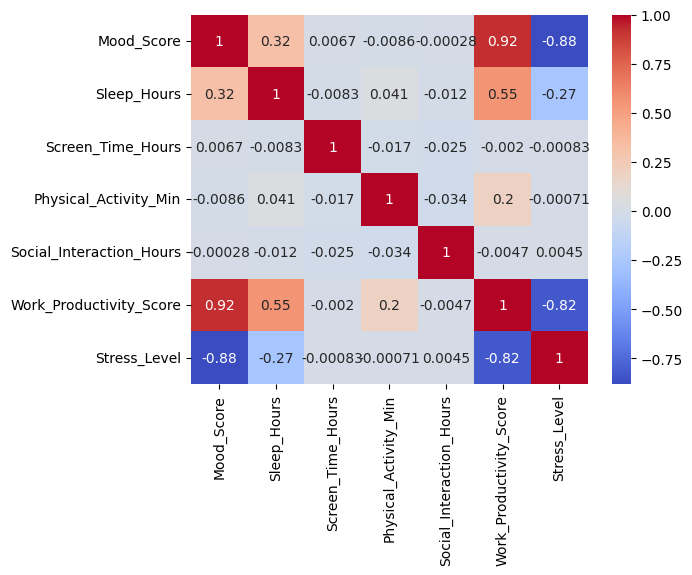

In [ ]:
#plot.figure(figsize=(10, 8))
sns.heatmap(DATA.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
#plot.title('Correlation Matrix')
#plot.show()

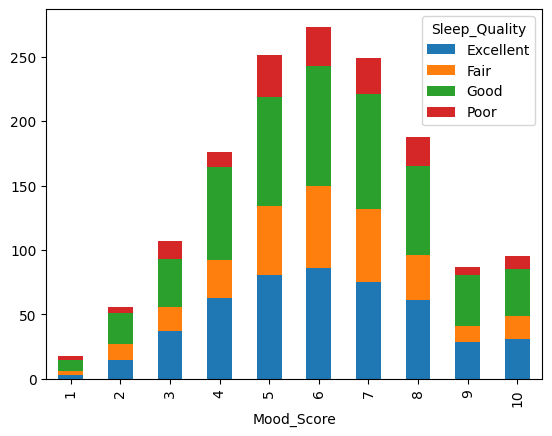

In [ ]:
sleep_counts = DATA.groupby(['Mood_Score', 'Sleep_Quality']).size().unstack(fill_value=0)
ax = sleep_counts.plot(
    kind='bar',
    stacked=True
)

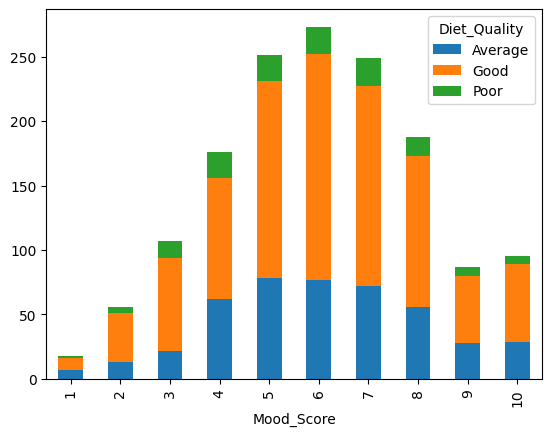

In [ ]:
diet_counts = DATA.groupby(['Mood_Score', 'Diet_Quality']).size().unstack(fill_value=0)
ax = diet_counts.plot(
    kind='bar',
    stacked=True
)

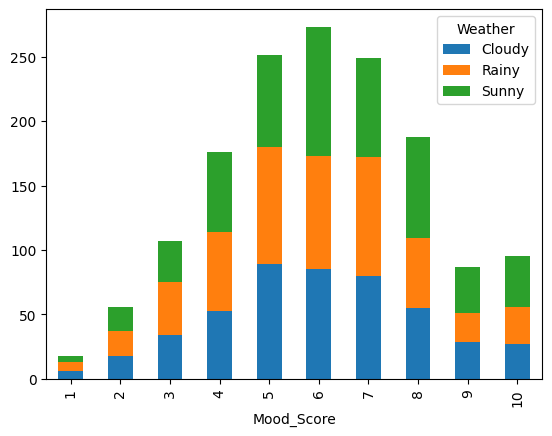

In [ ]:
weather_counts = DATA.groupby(['Mood_Score', 'Weather']).size().unstack(fill_value=0)
ax = weather_counts.plot(
    kind='bar',
    stacked=True
)

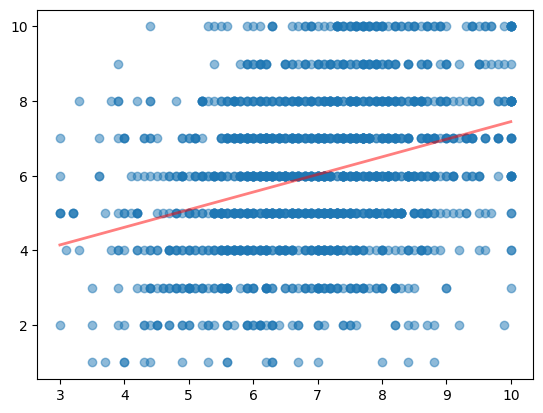

In [ ]:
plot.scatter(DATA['Sleep_Hours'], DATA['Mood_Score'],alpha = 0.5)
m, b = np.polyfit(DATA['Sleep_Hours'], DATA['Mood_Score'], 1)  # y = m*x + b

x = DATA['Sleep_Hours']
y = DATA['Mood_Score']
x_line = np.linspace(min(x), max(x), 200)
coef1 = np.polyfit(x, y, 1)
poly1 = np.poly1d(coef1)
plot.plot(x_line, poly1(x_line), color='red', linewidth=2, label="Degree 1 (Linear)",alpha = 0.5)

---

#Preprocessing

---

In [ ]:
target = 'Mood_Score'
exclude = ['User_ID', 'Date']
DATA.drop(exclude, axis=1, inplace=True)
objs = DATA.select_dtypes(include="object").columns
train, test = train_test_split(DATA, test_size = 0.2, random_state = 0, shuffle = True)
train_encoded = pd.get_dummies(train, columns=objs)
test_encoded = pd.get_dummies(test, columns=objs)


---

#Linear Regression

---

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
"""
X_train = train[train.select_dtypes(include=[np.number]).columns[1:]]
Y_train = train[target]
X_test = test[test.select_dtypes(include=[np.number]).columns[1:]]
Y_test = test[target]
"""
X_train = train_encoded[train_encoded.columns[3:]]
Y_train = train_encoded[target]
X_test = test_encoded[test_encoded.columns[3:]]
Y_test = test_encoded[target]

print(X_train.columns)
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Coefficients")
for feature, coef in sorted(zip(X_train.columns, model.coef_),key = lambda x: -abs(x[1])):
    print(f"  {feature}: {coef:.4f}")

print(f"RMSE: {rmse:.4f}")
print(f"R2 score: {r2:.4f}")

results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results.head())

Index(['Physical_Activity_Min', 'Social_Interaction_Hours',
       'Work_Productivity_Score', 'Stress_Level', 'Sleep_Quality_Excellent',
       'Sleep_Quality_Fair', 'Sleep_Quality_Good', 'Sleep_Quality_Poor',
       'Weather_Cloudy', 'Weather_Rainy', 'Weather_Sunny',
       'Diet_Quality_Average', 'Diet_Quality_Good', 'Diet_Quality_Poor'],
      dtype='object')
Coefficients
  Work_Productivity_Score: 0.6484
  Stress_Level: -0.2954
  Diet_Quality_Poor: -0.0614
  Weather_Rainy: -0.0465
  Diet_Quality_Average: 0.0407
  Weather_Sunny: 0.0394
  Diet_Quality_Good: 0.0207
  Physical_Activity_Min: -0.0204
  Sleep_Quality_Poor: -0.0134
  Sleep_Quality_Good: 0.0083
  Weather_Cloudy: 0.0071
  Sleep_Quality_Excellent: 0.0050
  Social_Interaction_Hours: -0.0018
  Sleep_Quality_Fair: 0.0001
RMSE: 0.5816
R2 score: 0.9136
      Actual  Predicted
471        5   4.952421
9          5   5.826765
1499       6   6.937090
54         3   2.307927
1411       3   2.629136


---

#XGBoost

---

In [ ]:
import xgboost as xgb

(300,)
      Actual  Predicted
471        5   5.036853
9          5   5.125435
1499       6   6.866646
54         3   2.445322
1411       3   2.898516
RMSE: 0.6040
R2 Score: 0.9068


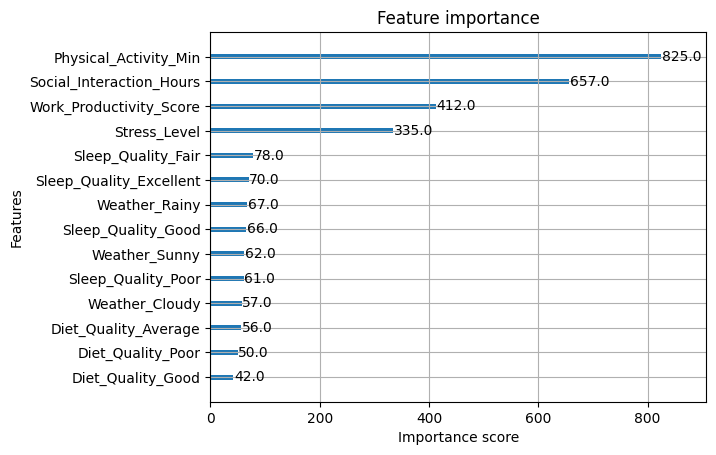

In [ ]:
"""
X_train = train[train.select_dtypes(include=[np.number]).columns[1:]]
Y_train = train[target]
X_test = test[test.select_dtypes(include=[np.number]).columns[1:]]
Y_test = test[target]
"""

X_train = train_encoded[train_encoded.columns[3:]]
Y_train = train_encoded[target]
X_test = test_encoded[test_encoded.columns[3:]]
Y_test = test_encoded[target]


xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)


xgb_reg.fit(X_train, Y_train)


Y_pred = xgb_reg.predict(X_test)
print(Y_pred.shape)
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results.head())
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

xgb.plot_importance(xgb_reg)
plot.show()

---

#Neural Network

---

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
class Model(nn.Module):
        def __init__(self, input_size):
            super(Model, self).__init__()
            self.fc1 = nn.Linear(input_size, 64)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(0.2)
            self.fc2 = nn.Linear(64, 32)
            self.fc3 = nn.Linear(32, 1)

        def forward(self, x):
            x = self.fc1(x)
            x = self.relu(x)
            x = self.dropout(x)
            x = self.fc2(x)
            x = self.relu(x)
            x = self.dropout(x)
            x = self.fc3(x)
            return x

In [ ]:
"""
X_train = train[train.select_dtypes(include=[np.number]).columns[1:]]
Y_train = train[target]
X_test = test[test.select_dtypes(include=[np.number]).columns[1:]]
Y_test = test[target]
"""

X_train = torch.from_numpy(train_encoded[train_encoded.columns[3:]].to_numpy(dtype=np.float32))
Y_train = torch.from_numpy(train_encoded[target].to_numpy(dtype=np.float32)).view(-1,1)
X_test = torch.from_numpy(test_encoded[test_encoded.columns[3:]].to_numpy(dtype=np.float32))
Y_test = torch.from_numpy(test_encoded[target].to_numpy(dtype=np.float32)).view(-1,1)


train_dataset, test_dataset = TensorDataset(X_train, Y_train), TensorDataset(X_test)
train_loader, test_loader = DataLoader(train_dataset, batch_size=32, shuffle=True), DataLoader(test_dataset, batch_size=32)
#input_size = train_encoded[train_encoded.columns[3:]]
input_size = train_encoded[train_encoded.columns[3:]].shape[1]
model = Model(input_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)


In [ ]:
for epoch in range(100):
    model.train() # Set model to training mode
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad() # Zero the parameter gradients

        outputs = model(inputs) # Forward pass
        loss = criterion(outputs, labels) # Calculate loss
        loss.backward() # Backward pass
        optimizer.step() # Optimize

        running_loss += loss.item()
        if i % 10 == 9: # Print every 10 batches
            print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 10:.3f}")
            running_loss = 0.0


Epoch 1, Batch 10, Loss: 19.813
Epoch 1, Batch 20, Loss: 8.858
Epoch 1, Batch 30, Loss: 4.815
Epoch 2, Batch 10, Loss: 2.456
Epoch 2, Batch 20, Loss: 2.747
Epoch 2, Batch 30, Loss: 2.033
Epoch 3, Batch 10, Loss: 1.536
Epoch 3, Batch 20, Loss: 1.671
Epoch 3, Batch 30, Loss: 1.673
Epoch 4, Batch 10, Loss: 1.755
Epoch 4, Batch 20, Loss: 1.650
Epoch 4, Batch 30, Loss: 1.574
Epoch 5, Batch 10, Loss: 1.675
Epoch 5, Batch 20, Loss: 1.778
Epoch 5, Batch 30, Loss: 1.473
Epoch 6, Batch 10, Loss: 1.529
Epoch 6, Batch 20, Loss: 1.238
Epoch 6, Batch 30, Loss: 1.447
Epoch 7, Batch 10, Loss: 1.454
Epoch 7, Batch 20, Loss: 1.607
Epoch 7, Batch 30, Loss: 1.342
Epoch 8, Batch 10, Loss: 1.545
Epoch 8, Batch 20, Loss: 1.655
Epoch 8, Batch 30, Loss: 1.292
Epoch 9, Batch 10, Loss: 1.407
Epoch 9, Batch 20, Loss: 1.296
Epoch 9, Batch 30, Loss: 1.382
Epoch 10, Batch 10, Loss: 1.531
Epoch 10, Batch 20, Loss: 1.410
Epoch 10, Batch 30, Loss: 1.407
Epoch 11, Batch 10, Loss: 1.660
Epoch 11, Batch 20, Loss: 1.785
Ep

In [ ]:
Y_pred = model(X_test).reshape(-1).detach().numpy()
Y_test = test_encoded[target].to_numpy(dtype=np.float32)
results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(results.head())
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


   Actual  Predicted
0     5.0   4.742405
1     5.0   5.444126
2     6.0   6.445595
3     3.0   2.977331
4     3.0   2.415645
RMSE: 0.7391
R2 Score: 0.8605
